# Data Analysis Project
### Fall 2023
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="800"
  height="650"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [2]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.



### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:How does claim frequency vary by policy type? 


**Answer**: I have grouped the data based on the policy and summarized the claim frequency. I chose barplot the understand the frequency.In the graph, the x-axis indicates the policy and y-axis indicates the claim freqency. From the bar plot, we can infer that the personal policy had more claims and the special policy had lowest number of claims.

## Supporting Analysis

In [4]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

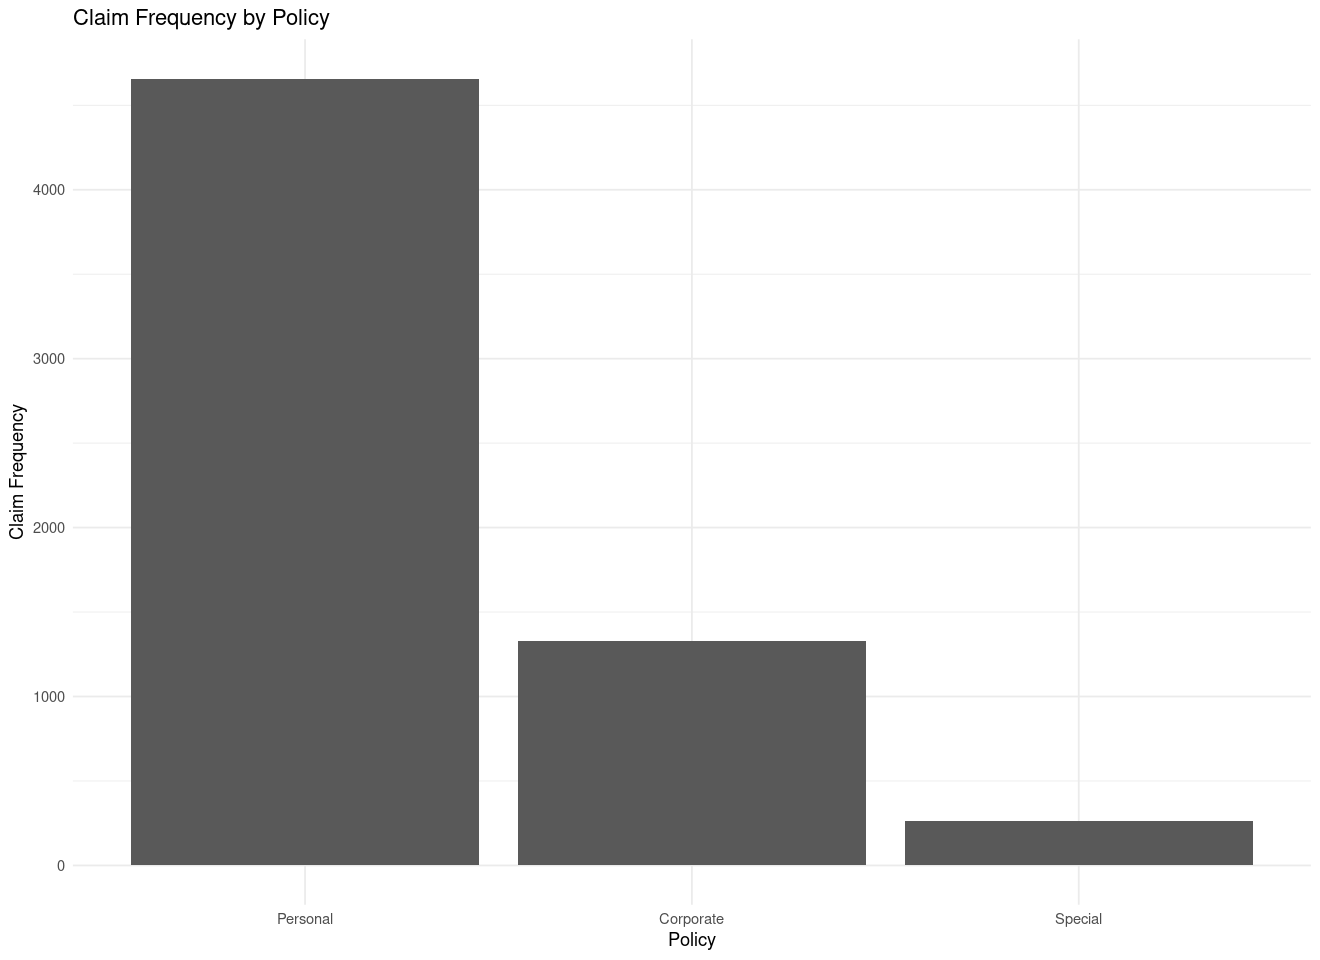

In [5]:
library(dplyr)
library(ggplot2)


# Analyze claim frequency by policy type
claim_freq_by_policy <- claims_df %>%
  group_by(policy) %>%
  summarize(claim_frequency = n())

# Create a bar plot
ggplot(claim_freq_by_policy, aes(x = policy, y = claim_frequency)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Claim Frequency by Policy",
       x = "Policy",
       y = "Claim Frequency")

## Question 2


**Question**: What is the distribution of higher education on months_policy_active and the monthly_premium?"

**Answer**:

In the x axis it is months_policy_active and in y axis it is Monthly Premium and the title is Monthly Premium by policy active.To distinguish the various educational levels in the plot, I used the fill color. The graphic displays the median value and the interquartile range. Outliers cannot be disregarded since their whiskers can be up to twice the interquartile range. The educational levels in this plot can be categorized as falling between the minimum and maximum values. The Masters customers had maximum monthly premium with 30 months active policy.

## Supporting Analysis


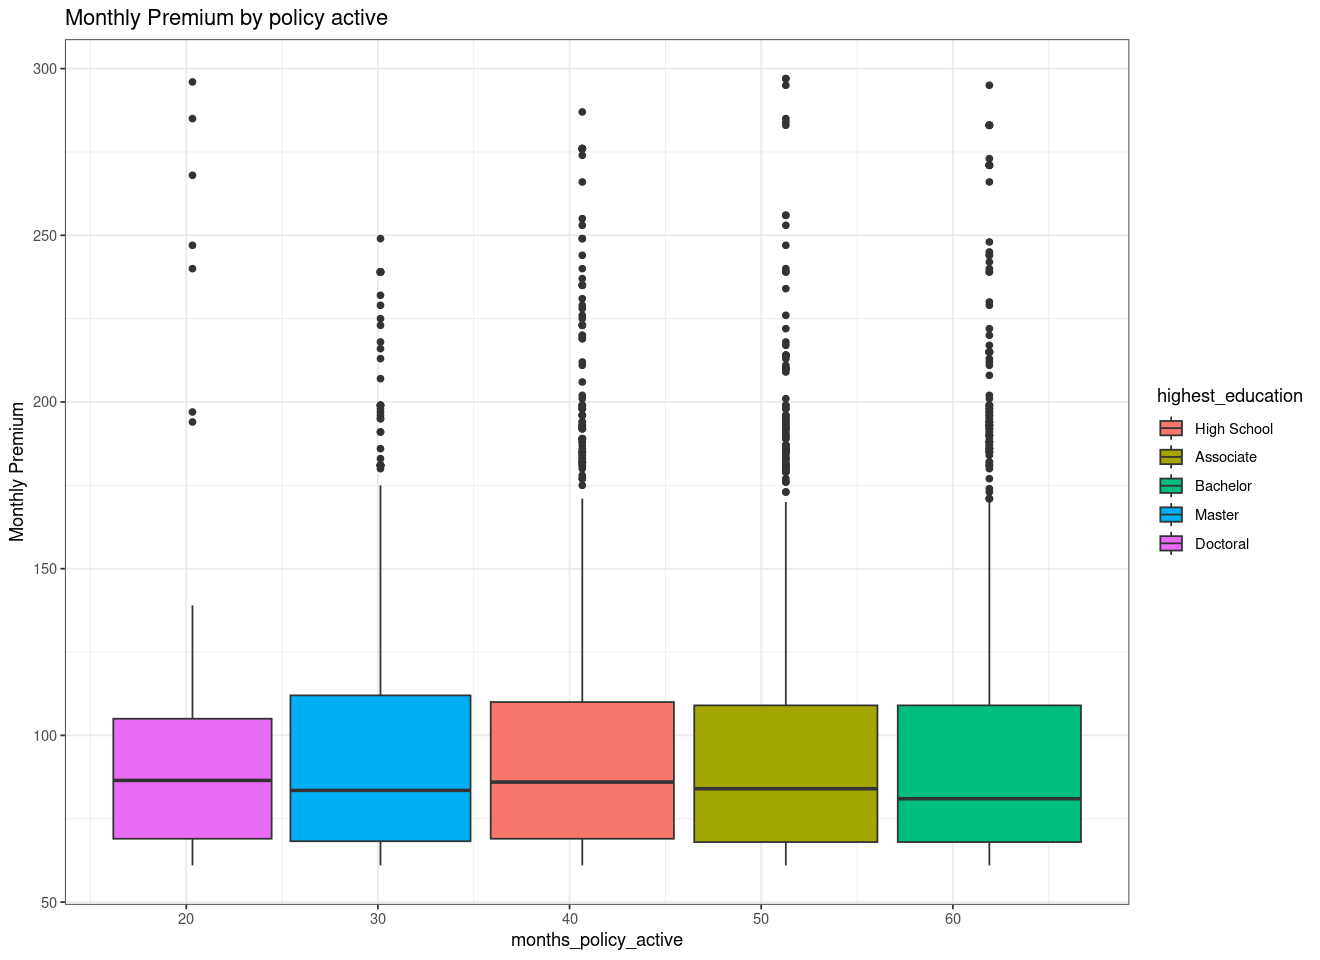

In [17]:
ggplot(claims_df, aes(x = months_policy_active, y = monthly_premium, fill=highest_education)) +
  geom_boxplot() +
  labs(x = "months_policy_active", y = "Monthly Premium",
       title = "Monthly Premium by policy active") +
  theme_bw() 

## Question 3


**Question**:What is the distribution of total claims count based on the combination of gender and income?


**Answer**:Depending on the gender and income combination of the overall claims count can shed light on the relationship between these demographic variables and insurance claims. This study can reveal trends or distinctions in claim behavior between groups based on gender and income. This is the total number of insurance claims made by people across all ages, genders, and economic levels. It essentially demonstrates the volume of claims made by various combinations of gender and wealth. we can start the group by data with gender and income using the group_by function. we can get the total claims count on summarise. Then we can arrange in desc order of the count which makes the highest total claim count in order.

## Supporting Analysis


In [8]:
summary_gender_income <- claims_df %>%
  group_by(gender, income) %>%
  summarise(total_claims_count = n(), .groups ="keep") %>%
  arrange(desc(total_claims_count))
summary_gender_income

New names:
• `` -> `...1`


gender,income,total_claims_count
<fct>,<dbl>,<int>
Male,95697,12
Female,25370,7
Female,25965,7
Male,20978,7
Male,27972,7
Female,10312,6
Female,11432,6
Female,11828,6
Female,11885,6


## Question 4


**Question**:"How does the distribution of vehicle classes vary across different vehicle sizes?"
 
**Answer**: The x-axis shows the number of each vehicle class, while the fill shows various vehicle sizes. To make it easier to compare different vehicle sizes, the bars for each vehicle size are offset such that each color corresponds to a different vehicle class.You can see the distribution of vehicle classes for each category of vehicle size (such as small, medium, and large). we can observed that large size categories tend to have more SUVs than small or medium size categories. the title is Distribution of Vehicle Class by Vehicle Size. the mid size has the highest distribution of vehicle class by vehicle size.

## Supporting Analysis


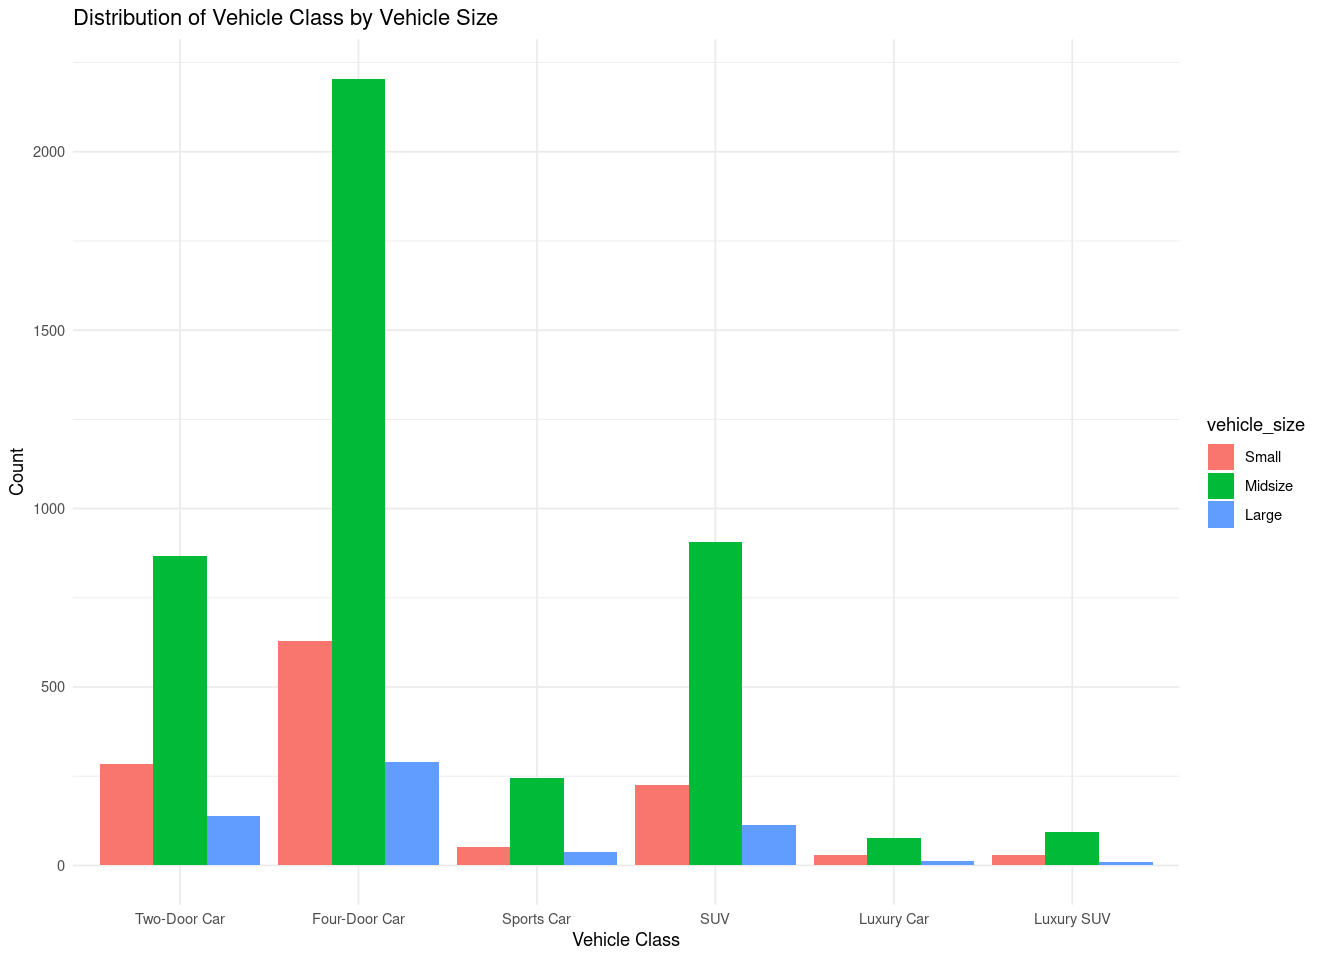

In [9]:
library(ggplot2)

# Create a bar plot of vehicle_class by vehicle_size
ggplot(claims_df, aes(x = vehicle_class, fill = vehicle_size)) +
  geom_bar(position = "dodge", stat = "count") +
  theme_minimal() +
  labs(title = "Distribution of Vehicle Class by Vehicle Size",
       x = "Vehicle Class",
       y = "Count")

## Question 5


**Question**: What connection exists between the total quantity of claims and the two factors of vehicle class and coverage?


**Answer : In the x axis - sales channel and y axis total claims amount and fill with coverage and the title is claim amount by sales channel and coverage.The interquartile range, or the range within which the center 50% of the data falls, is shown by the height of each box. These are total claims count figures that differ noticeably from the rest of the data in terms of their highs or lows. In conclusion, a box plot can give important information about the relationship between the total number of claims, vehicle class, and coverage.In every coverage the basic is highest in between the 3000 and 4000. 



## Supporting Analysis


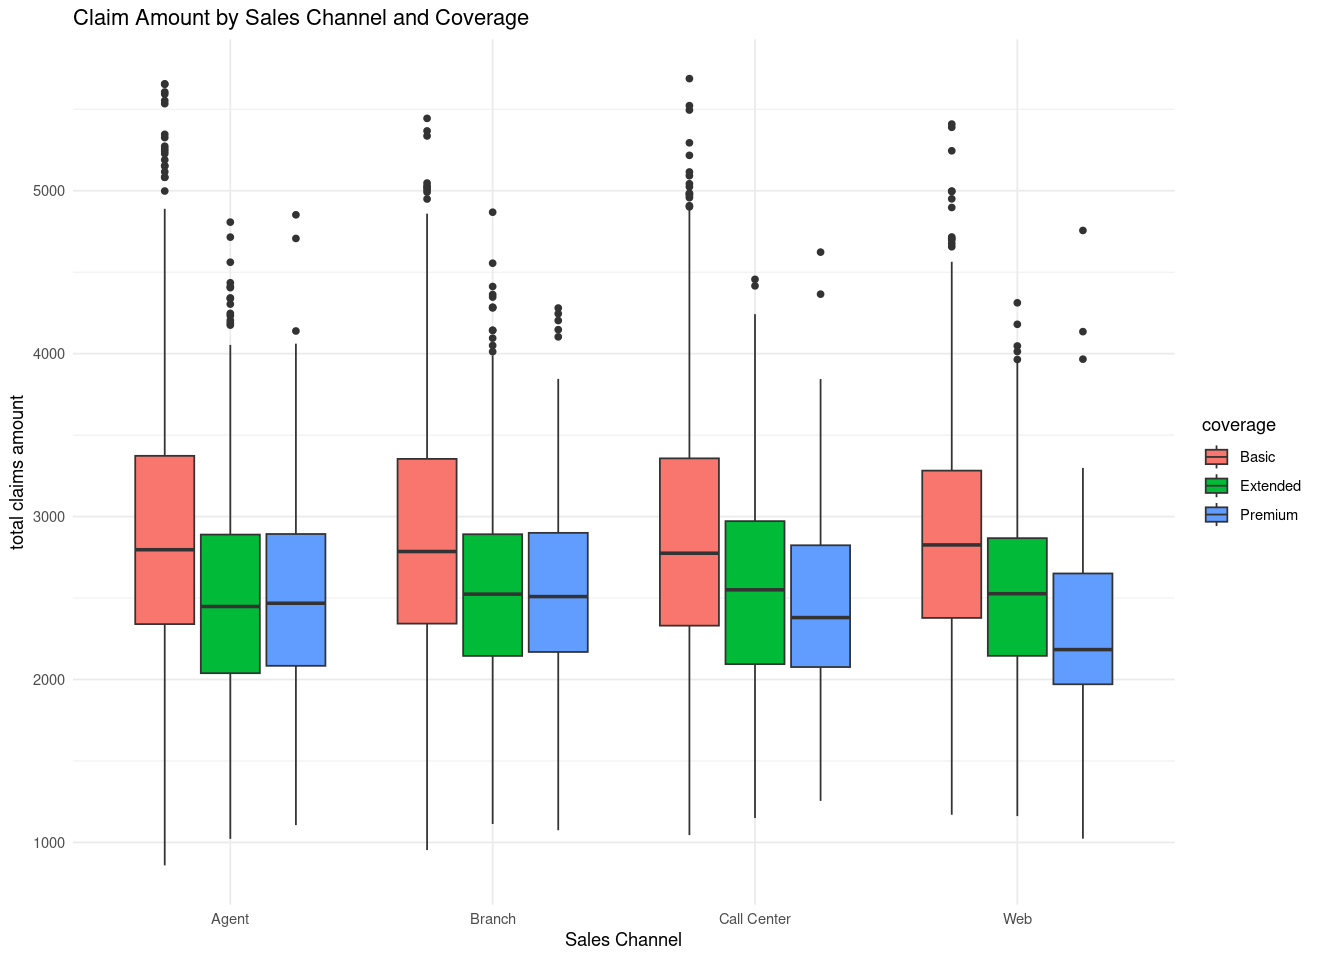

In [10]:
library(ggplot2)

# Create a box plot of claim_amount by sales_channel and coverage
ggplot(claims_df, aes(x = sales_channel, y = total_claims_amount, fill = coverage)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Claim Amount by Sales Channel and Coverage",
       x = "Sales Channel",
       y = "total claims amount")

## Question 6


**Question**: Identify the state which has the most number of customers?


**Answer**: The barplot shows us how many customers each state has. Using the dplyr function, I calculated the total number of clients for each state. California has the largest count, while Washington has the lowest, according to the bar graph.

## Supporting Analysis


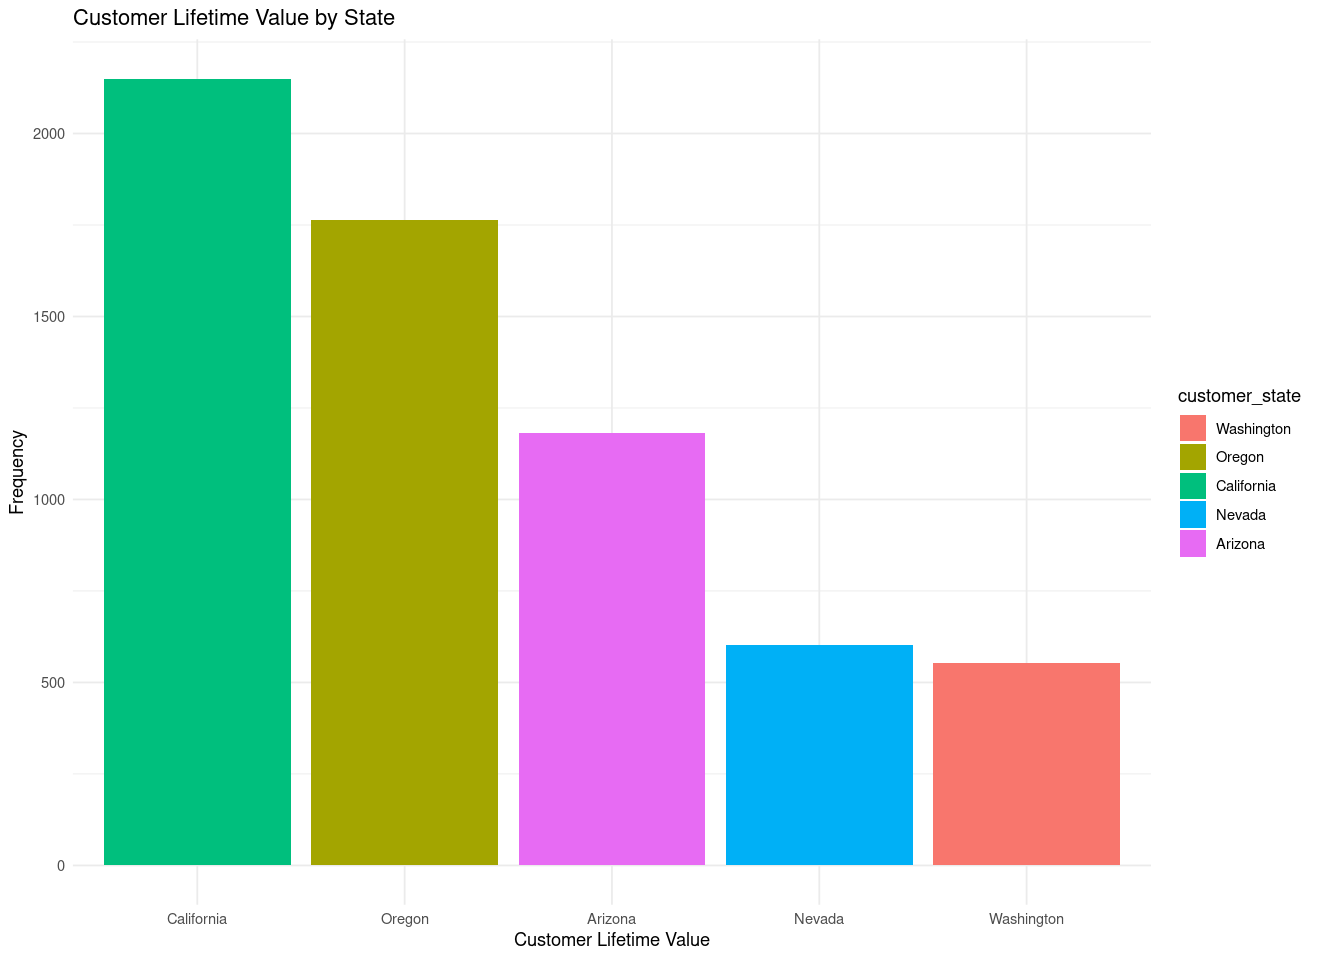

In [22]:
library(ggplot2)

claim <- claims_df %>% count(customer_state)

ggplot(claim, aes(y = n, x = reorder(customer_state, -n), fill = customer_state)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Customer Lifetime Value by State",
       x = "Customer Lifetime Value",
       y = "Frequency")

## Question 7


**Question**: what is the percentage distribution of vehicle class?



**Answer**: Calculating the proportion of each vehicle class category and then plotting these proportions against the vehicle class categories are required to create a line plot to show the percentage distribution of vehicle class.The percentage of each vehicle class in relation to the total number of cars is shown on the line plot's y-axis. For instance, we might see that as walk along the x-axis, the percentage of a specific car class either rises or falls. In the line plot, four door car with 50 and it goes down to luxury car with 2. we can easily identify which vehicle is distrubution highly here.

## Supporting Analysis


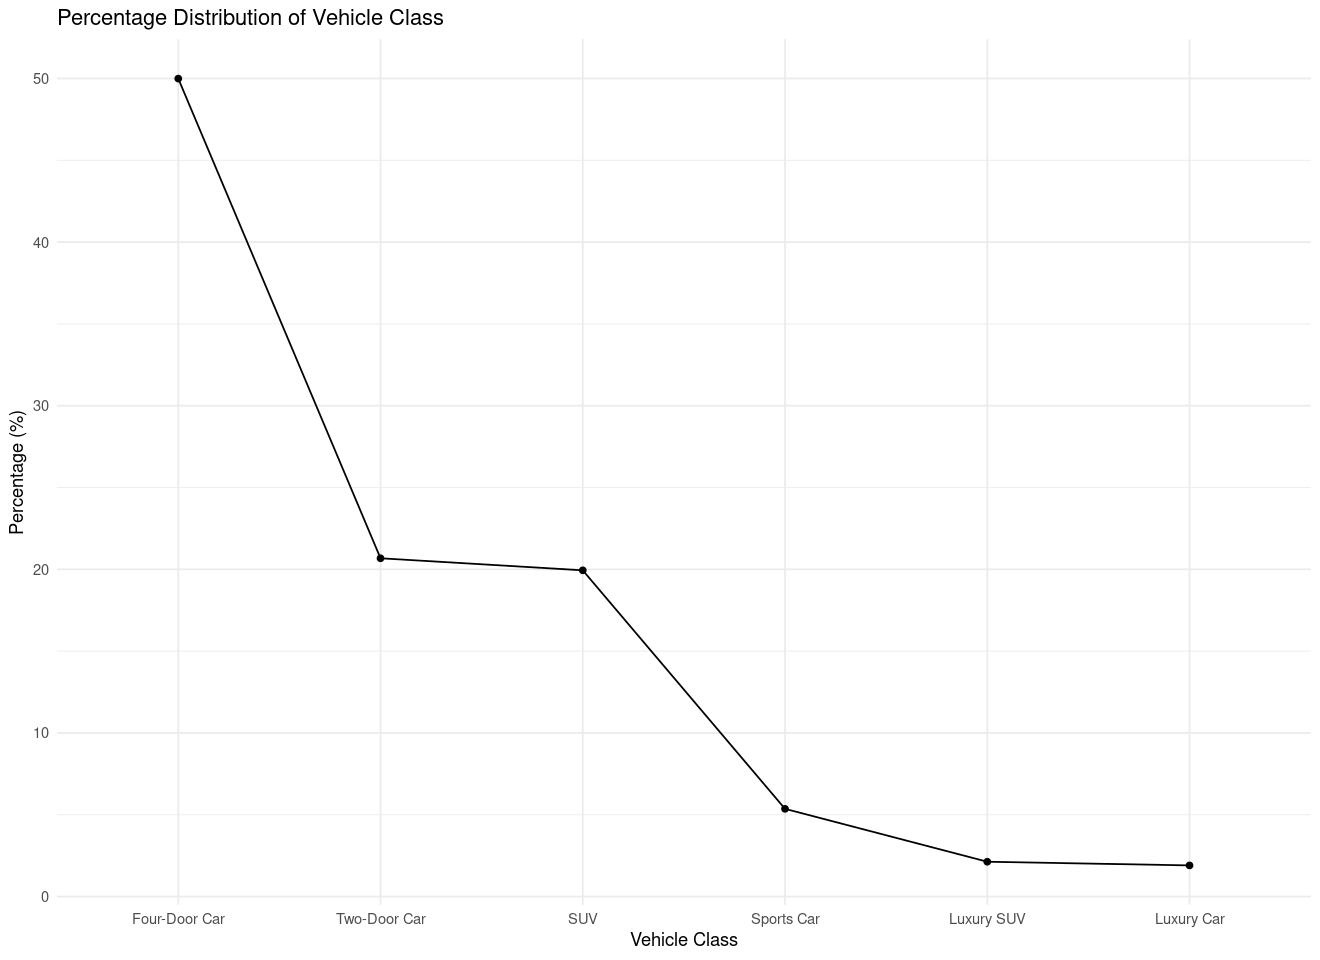

In [12]:
library(ggplot2)

# Calculate the percentage distribution of vehicle_class
percentage_distribution <- claims_df %>%
  count(vehicle_class) %>%
  mutate(percentage = n / sum(n) * 100)

# Create a line plot of the percentage distribution of vehicle_class
ggplot(percentage_distribution, aes(x = reorder(vehicle_class, -percentage), y = percentage)) +
  geom_line(group = 1) +
  geom_point() +
  theme_minimal() +
  labs(title = "Percentage Distribution of Vehicle Class",
       x = "Vehicle Class",
       y = "Percentage (%)")

## Question 8


**Question**: what is the relationship between the highest education and employment status ?



**Answer**: An illustration of the frequency or count of occurrences of each combination of education level and work status in the dataset is given by the heatmap's link between highest_education and employment_status.Each heatmap cell corresponds to a certain highest_education and employment_status combination. The cell's color denotes the number or frequency of times that particular combination appeared in the dataset. Each cell's color intensity corresponds to the count or frequency. lighter, colder colors denote greater counts or frequencies, while darker, warmer colors denote fewer counts or frequencies. This makes it possible to compare the distribution of possible combinations visually.



## Supporting Analysis


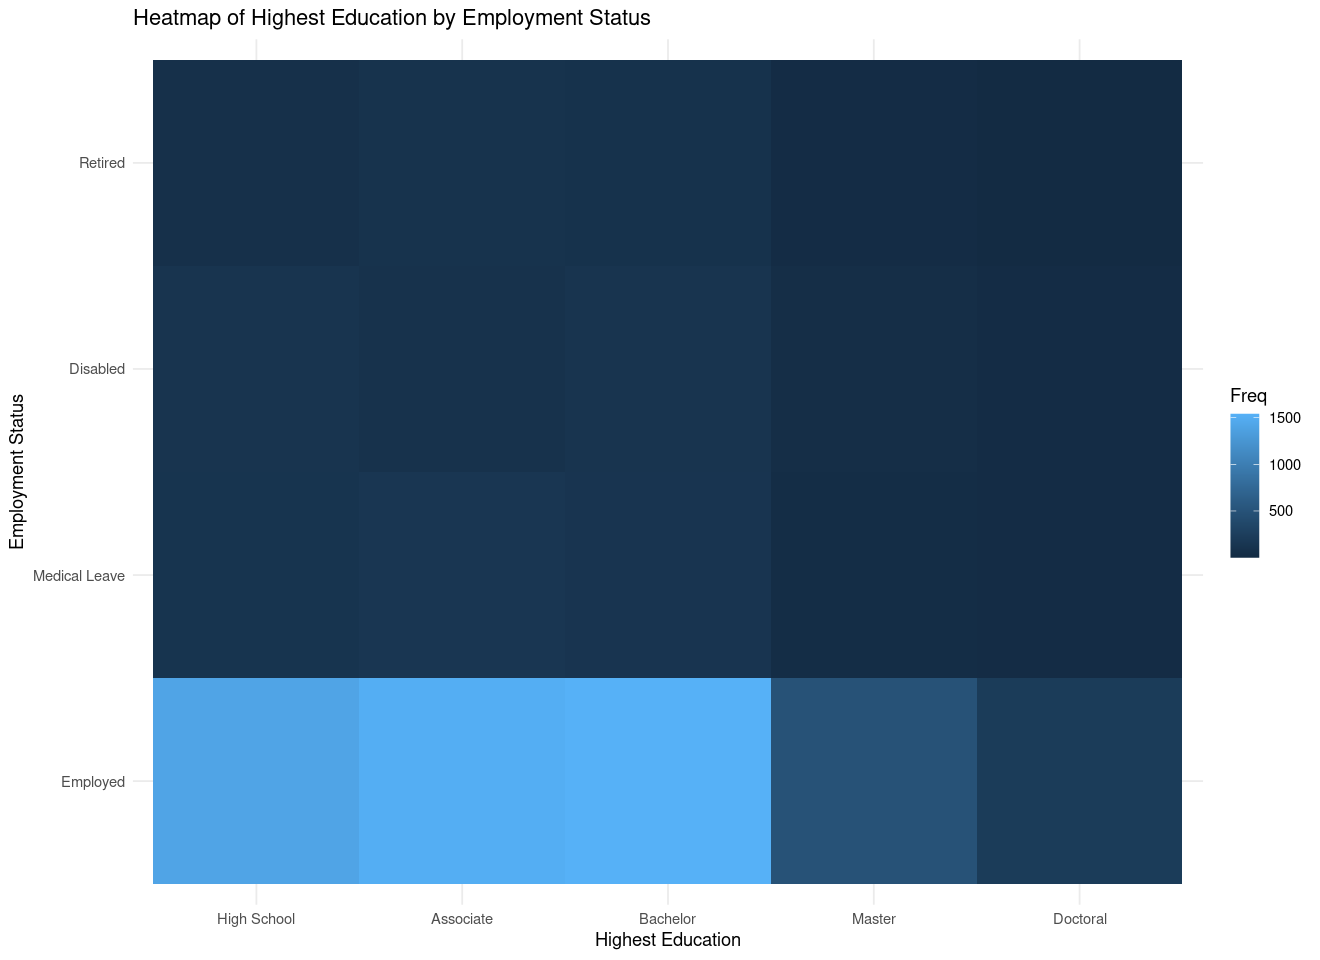

In [16]:
library(dplyr)
library(ggplot2)


claim_ed <- table(claims_df$highest_education, claims_df$employment_status)

data_for_plot <- as.data.frame(as.table(claim_ed))

# Create a heatmap of highest_education by employment_status
ggplot(data_for_plot, aes(x = Var1, y = Var2, fill = Freq)) +
  geom_tile() +
  theme_minimal() +
  labs(title = "Heatmap of Highest Education by Employment Status",
       x = "Highest Education",
       y = "Employment Status")

# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction

Over the past few years, the automotive insurance company, which serves the southwest and western parts of the country, has seen its profits decline. Understanding the variables affecting claim frequency and severity, consumer behavior, and insurance pricing, as well as offering practical suggestions to increase profitability. Over the past five years, the company has seen its profits steadily diminish. By providing plans that are reasonably priced and customized to consumer needs, it may strengthen its competitive edge.

## Key Findings

We discovered a relationship between the monthly premium and the number of years a policy has been in effect, indicating that pricing tactics might be adjusted in accordance with policy longevity.Age, education level, and work status were among the many consumer segments where disparities in claim frequency and severity were found. A correlation between vehicle class (vehicle_class), coverage (coverage), and the overall number of claims was found through analysis. This finding is valuable for the company because it identifies areas where the terms and conditions of the policies could be changed to better match observed claim patterns and customer preferences, resulting in more efficient risk management.

## Recommendations

To optimize premiums and boost profitability, use dynamic pricing models that take into account elements like insurance tenure, customer demographics, and vehicle attributes. In order to better correspond with known claim patterns and risk exposures, review and modify the terms and conditions of the policy for particular vehicle classes and coverage levels. These suggestions can help the insurance provider improve its pricing tactics, customer segmentation, policy terms, and sales channel performance, all of which will help it become more profitable and continue to succeed in industry.
